In [23]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ydata_profiling import ProfileReport

In [24]:
path = r"D:\Red and White\GIT_HUB_repository\Projects\EDA\Traffice_data\traffic.csv"
df = pd.read_csv(path)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [26]:

# Convert DateTime column
df["DateTime"] = pd.to_datetime(df["DateTime"])

# Verify the change
print(df.dtypes)


DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
ID                   int64
dtype: object


In [27]:
df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y-%m-%d %H:%M:%S", errors="coerce")    

In [28]:
df.head(5)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [29]:
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [30]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 48120, and columns are 4.


In [31]:
df.isnull().sum().sort_values(ascending = False)

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

### <center> Observation Set 1 </center>

There are 48120 rows and 4 columns in the dataset.  
The data type of all columns is int64 except one which has date and time.  
The columns in the datasets are:
  ['DateTime', 'Junction', 'Vehicles', 'ID']

In [32]:
df.describe()

,DateTime,Junction,Vehicles,ID
count,48120,48120.000000,48120.000000,4.812000e+04
mean,2016-09-19 06:03:56.109725696,2.180549,22.791334,2.016330e+10
min,2015-11-01 00:00:00,1.000000,1.000000,2.015110e+10
25%,2016-04-16 01:45:00,1.000000,9.000000,2.016042e+10
50%,2016-09-30 03:30:00,2.000000,15.000000,2.016093e+10
75%,2017-02-25 16:00:00,3.000000,29.000000,2.017023e+10
max,2017-06-30 23:00:00,4.000000,180.000000,2.017063e+10
std,NaN,0.966955,20.750063,5.944854e+06


In [33]:
# Find Duplicate
df.duplicated().any()

False

In [34]:
df['date'] = df["DateTime"].dt.date
df['time'] = df["DateTime"].dt.time

In [35]:
df['hour'] = df["DateTime"].dt.hour
df['day'] = df["DateTime"].dt.day
df['month'] = df["DateTime"].dt.month
df['year'] = df["DateTime"].dt.year
df['dayofweek'] = df["DateTime"].dt.dayofweek


In [36]:
# Filter data for months 1 to 6
fd = df[df['month'].between(1, 6)]

# Use the filtered_data DataFrame for further analysis and visualization
fd

,DateTime,Junction,Vehicles,ID,date,time,hour,day,month,year,dayofweek
1464,2016-01-01 00:00:00,1,13,20160101001,2016-01-01,00:00:00,0,1,1,2016,4
1465,2016-01-01 01:00:00,1,13,20160101011,2016-01-01,01:00:00,1,1,1,2016,4
1466,2016-01-01 02:00:00,1,11,20160101021,2016-01-01,02:00:00,2,1,1,2016,4
1467,2016-01-01 03:00:00,1,6,20160101031,2016-01-01,03:00:00,3,1,1,2016,4
1468,2016-01-01 04:00:00,1,8,20160101041,2016-01-01,04:00:00,4,1,1,2016,4
...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017-06-30,19:00:00,19,30,6,2017,4
48116,2017-06-30 20:00:00,4,30,20170630204,2017-06-30,20:00:00,20,30,6,2017,4
48117,2017-06-30 21:00:00,4,16,20170630214,2017-06-30,21:00:00,21,30,6,2017,4
48118,2017-06-30 22:00:00,4,22,20170630224,2017-06-30,22:00:00,22,30,6,2017,4


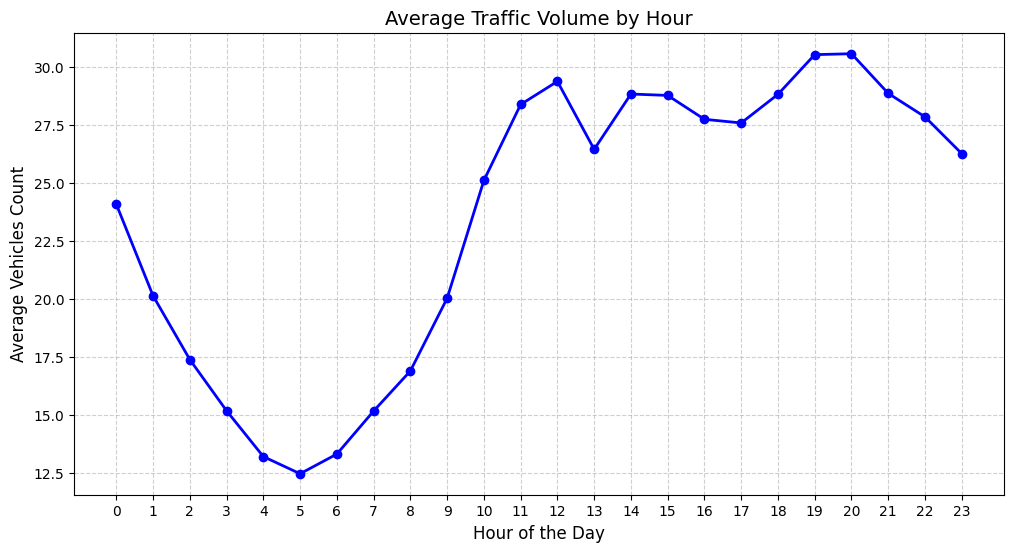

In [37]:
avg_traffic_per_hour = fd.groupby("hour")["Vehicles"].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_traffic_per_hour.index, avg_traffic_per_hour.values, marker="o", linestyle="-", color="b", linewidth=2)

plt.title("Average Traffic Volume by Hour", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Vehicles Count", fontsize=12)
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Average Traffic Volume by Hour

- The **x-axis** represents the hour of the day (0 to 23), while the **y-axis** displays the average vehicle count (ranging from 12.5 to 30.0). 
- Traffic volume is **lowest around 5 AM** and **peaks at 5 PM**. 
- There's a **noticeable dip during early morning hours**, followed by a **steady increase from 6 AM onward**, reaching its highest point in the late afternoon.
- After the peak, traffic **gradually declines in the evening**.


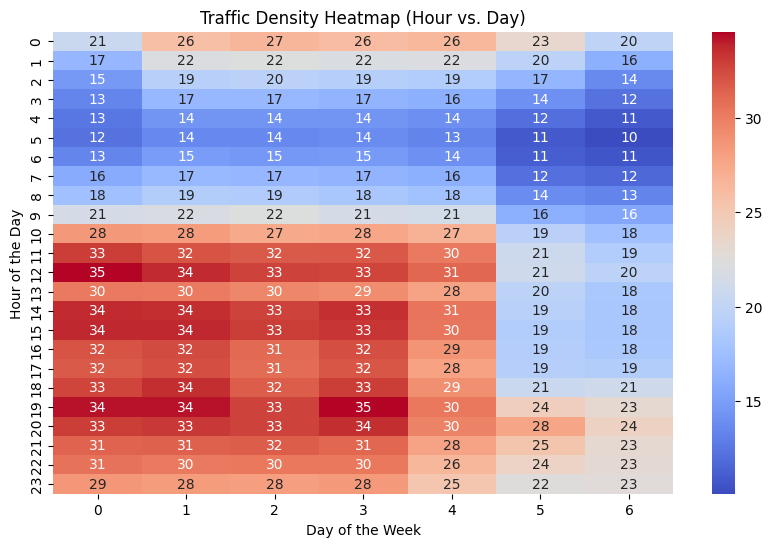

In [38]:
# Pivot table for heatmap
heatmap_data = fd.pivot_table(values="Vehicles", index="hour", columns="dayofweek")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Traffic Density Heatmap (Hour vs. Day)")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.show()


## Traffic Density Heatmap (Hour vs. Day)

- **X-axis:** Represents days of the week (0 to 6).
- **Y-axis:** Represents hours of the day (0 to 23).
- **Color Gradient:** Ranges from blue (low traffic) to red (high traffic), with numbers indicating traffic density values.

## Observations:
- **Peak Traffic:** Afternoon and evening hours (12 PM to 8 PM) show the highest density, particularly around **1 PM to 3 PM**.
- **Low Traffic:** Early mornings (12 AM to 8 AM) and late nights (9 PM to 11 PM) have significantly lower density.
- **Weekday vs. Weekend:** Traffic variations suggest different commuting habits based on the day.

In [39]:
fig = px.scatter(fd, x="Junction", y="Vehicles", color="Junction",
                 size="Vehicles", hover_data=["DateTime"])
fig.update_layout(title="Traffic Volume by Junction", xaxis_title="Junctions", yaxis_title="Vehicles Count")
fig.show()


## Traffic Volume by Junction
### Analysis:
- **Axes:**
  - **X-axis:** Represents different junctions.
  - **Y-axis:** Shows the vehicle count.
- **Color Representation:** 
  - Colors range from **purple (lowest traffic volume)** to **yellow (highest traffic volume)**.
  - Junctions are numbered from **1 to 4** based on the traffic intensity.

### Key Observations:
- **Junction 1** has the **highest traffic volume**, indicated by yellow.
- **Junction 3** follows closely behind with a significant vehicle count.
- **Junction 2 and 4** show relatively lower traffic density.


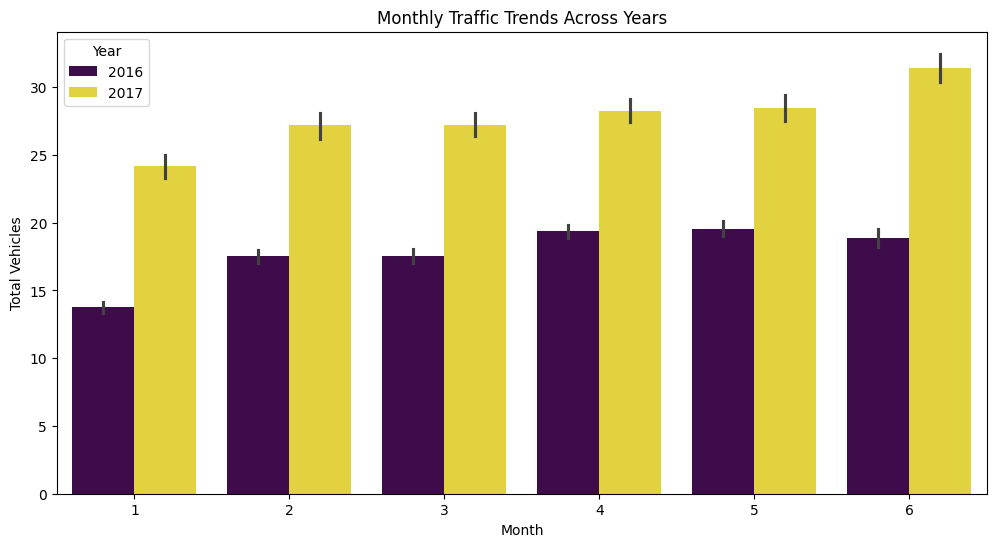

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fd, x="month", y="Vehicles", hue="year", palette="viridis")
plt.title("Monthly Traffic Trends Across Years")
plt.xlabel("Month")
plt.ylabel("Total Vehicles")
plt.legend(title="Year")
plt.show()


## Monthly Traffic Trends Across Years
**Key Observations:**
- **2017 consistently records higher traffic volume** than 2016 for each month.
- **Error bars indicate variability in vehicle counts**, helping assess uncertainty in the data.
- **Trend Suggestion:** There is a **steady increase in traffic volume** over the years, signaling growth in transportation activity.

C:\Users\Rudra\AppData\Local\Temp\ipykernel_10756\547085154.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




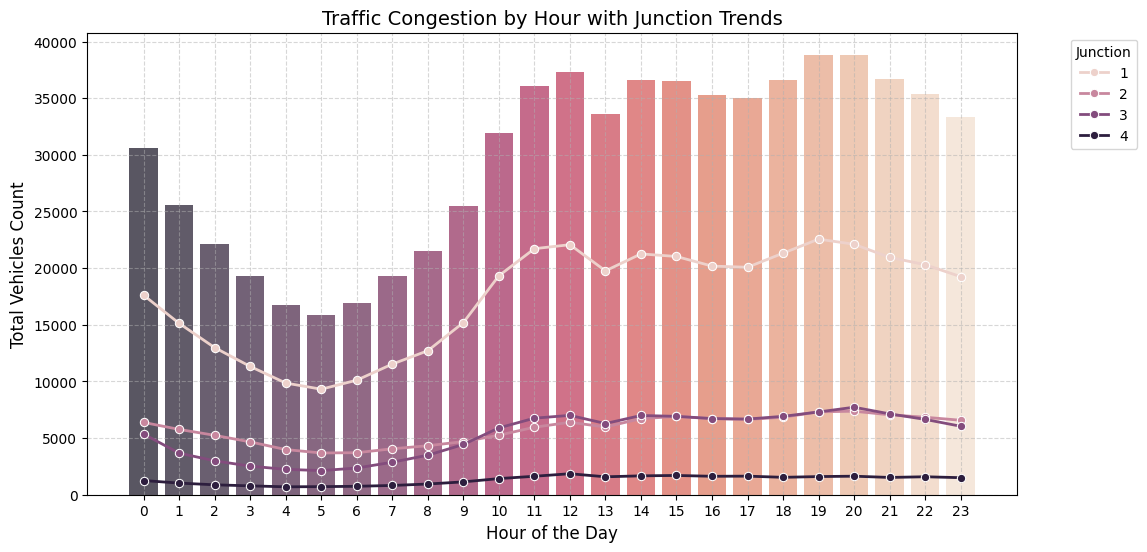

In [41]:
# Aggregate traffic count by hour (bar chart)
hourly_traffic = fd.groupby("hour")["Vehicles"].sum().reset_index()

# Aggregate traffic per junction over hours (line plot)
junction_traffic = fd.groupby(["hour", "Junction"])["Vehicles"].sum().reset_index()

# Set figure size
plt.figure(figsize=(12, 6))

# Bar plot for overall traffic by hour
sns.barplot(data=hourly_traffic, x="hour", y="Vehicles", palette="rocket", alpha=0.7)

# Line plot for junction-wise traffic trends
sns.lineplot(data=junction_traffic, x="hour", y="Vehicles", hue="Junction", marker="o", linewidth=2)

# Improve readability
plt.title("Traffic Congestion by Hour with Junction Trends", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Vehicles Count", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Junction", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()


## Traffic Congestion by Hour with Junction Trends
**Key Insights:**
- **X-axis:** Represents the hour of the day (0 to 23).
- **Y-axis:** Displays the total vehicle count.
- **Color Coding:** Different colors indicate data from four junctions:
  - **Junction 1 (light pink)**
  - **Junction 2 (pink)**
  - **Junction 3 (purple)**
  - **Junction 4 (dark purple)**

**Observations:**
- **Peak Traffic:** Midnight (hour 0) has the highest congestion, which then declines until early morning (hour 5).
- **Increasing Volume:** Traffic picks up again from hour 6 and reaches its peak around hour 15.
- **Junction Trends:** Junction 1 consistently records the highest vehicle count, while Junction 4 has the lowest.
- **Variation Across Junctions:** Each junction has distinct traffic trends, with Junction 1 experiencing a strong afternoon peak and Junction 4 maintaining relatively stable flow throughout the day.

In [42]:
# Aggregate traffic count by month
monthly_traffic = fd.groupby("month")["Vehicles"].sum().reset_index()

# Create interactive line plot
fig = px.line(monthly_traffic, x="month", y="Vehicles", markers=True, 
              title="Traffic Increase Over Months", 
              labels={"month": "Month", "Vehicles": "Total Vehicles"},
              line_shape="spline", template="plotly_dark")

# Customize layout for better readability
fig.update_layout(
    xaxis=dict(tickmode="linear", tickvals=list(range(1, 13))),
    yaxis_title="Total Vehicles Count",
    plot_bgcolor="rgba(0,0,0,0)", 
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show plot
fig.show()


## Traffic Increase Over Months
**Key Insights:**
- **X-axis:** Represents months labeled from **1 to 6**.
- **Y-axis:** Represents total vehicle count, ranging from **105k to 130k**.
- **Trend:** The graph **shows a steady increase** in traffic volume over the months.
- **Data Points:** Marked at each month, indicating a **gradual upward trend** in vehicle count.

# Final Report

**Key Findings from the Graphs:**  

**1. Peak Traffic Hours:**     
     - Highest congestion occurs during **afternoon (12 PM - 5 PM)** and **early morning (midnight to 5 AM)**.  
     - Traffic volume steadily increases from morning and peaks in the evening.  

**2. Junction-Based Congestion:**   
     - **Junction 1** experiences the highest vehicle count and congestion.  
     - **Junction 4** has the least congestion, indicating potential rerouting opportunities.  

**3. Monthly Growth in Traffic:**   
     - Consistent increase in vehicle count across months suggests **rising urban activity and vehicle dependency**.  

**4. Day vs. Hour Analysis:**   
     - **Weekdays** have noticeably higher traffic volume compared to weekends.  
     - Specific hours within each day show variability, helping pinpoint rush hours.  

# **Optimization Strategies:**
- **Smart Traffic Signals:** Implement **adaptive traffic lights** at high-density junctions (especially Junction 1) to dynamically adjust based on real-time traffic flow.  
- **Peak-Hour Management:** Introduce **staggered work schedules** and incentives for commuting during off-peak hours.  
- **Infrastructure Improvements:** Expand road capacity in high-traffic zones or create dedicated lanes for public transport.  
- **Public Transport Optimization:** Increase the efficiency of buses and trains, encouraging fewer private vehicles on the road.  
- **Rerouting Strategies:** Divert excess traffic from **Junction 1 to Junction 4** and redistribute vehicle load.  
- **Data-Driven Planning:** Use AI-based traffic prediction models to enhance decision-making.  